# Using Markov Chains for Generative Modeling 

In [1]:
# Part 1 
%pylab inline
import numpy as np
import IPython.display as display 
show = display.Latex

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Ignore this - just shows us a matrix 
def pretty(array): 
    prefix = '\\begin{pmatrix}'
    suffix = '\\end{pmatrix}'
    newline = "\\\\"
    narray = np.round(array, 3)
    main = newline.join(("&".join(map(str, line)) for line in narray))
    return prefix + main + suffix

def random_markov_chain(states=4): 
    if states < 2: 
        raise Exception("States must be greater than or equal to 2")
    free_variables = states - 1 
    random_chain = np.random.rand(states, free_variables) / free_variables 
    x_sum = random_chain.sum(axis=1).reshape((-1, 1))
    random_chain = np.hstack((random_chain, 1-x_sum)) 
    return random_chain

## Steady State
This section is just to get you more familiar with markov chains. 

Note, there is a *slight* chance you magically end up with an *irregular* markov chain. If that happens, run the code again to generate a new markov chain. The probablility of randomly getting an irregular markov chain is really, really low

In [3]:
# Create a Markov Chain, any Chain 
# Remember, must be a square matrix and rows must add up to 1 
# Boring Example: 
# [[0.5, 0.5],  
#  [0.5, 0.5]]
my_markov_chain = np.array(
[[0.1, 0.9], 
[0.9, 0.1]]  # Build your matrix here 
)
# alternatively, uncomment the below line for a random markov chain 
my_markov_chain = random_markov_chain(states = 4)
show(pretty(my_markov_chain))

<IPython.core.display.Latex object>

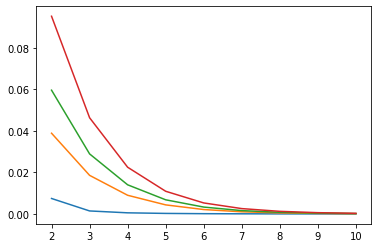

In [5]:
# Let's observe it as it gets to steady state
# Remember, a discrete-time markov chain converges on steady state as you take it to the infinite power 
# So, we can take it to incrementing powers of two and watch it converge 
# We're going to measure standard deviation across columns as our metric 
x = [1]
matrix = my_markov_chain.copy()
variances = [matrix.std(axis=0)]
max_power = 10
# I don't advise going too high
while x[-1] < max_power: 
    matrix = matrix @ my_markov_chain 
    x.append(x[-1] + 1)
    variances.append(matrix.std(axis=0))
variances = np.vstack(variances)
for k in range(matrix.shape[1]):
    plt.plot(x[1:], variances[1:, k])

In [5]:
show(pretty(matrix))

<IPython.core.display.Latex object>

Notice how it converges pretty fast! It's a quick, empirical way of calculating the steady-state. However, we can do this analytically too. First, let's see what happens when we multiply a random state distribution by our steady state. 

In [6]:
random_state_distribution = np.random.rand(matrix.shape[1] - 1) / (matrix.shape[1] - 1)
random_state_distribution = np.hstack((1 - random_state_distribution.sum(), random_state_distribution))
random_state_distribution = random_state_distribution.reshape((1, -1))
product = random_state_distribution @ matrix 
show("$" + pretty(random_state_distribution) + " " + pretty(matrix) + " = " + pretty(product) + "$")

<IPython.core.display.Latex object>

Surprise! It ends up being our steady state! Now, what happens if we multiply our steady-state by our markov chain...

In [7]:
show(pretty(product @ my_markov_chain))

<IPython.core.display.Latex object>

... it ends up being the steady state! So, if we have a steady state $S$ and a markov chain $M$, $$S * M = S$$ 
Think about how we can use that to calculate S if we don't have it already. Going back to Linear Algebra, we can see that this is very similar to: 
$$Av = \lambda v$$

This is actually a standard Eigenvector calculation. We have the advantage that we already know the eigenvalue (1). So, we simply have to solve the equation $$(M - I)S = 0$$ 

## Using Markov Chains for Generative Modeling

We're going to use a markov chain to generate some text in the style of an author. We're going to use one of the built-in stories from NLTK. 

``` conda install nltk```
or 

``` pip install nltk ``` 

if you have not already. 

Running the next code cell will open up the following pop up; follow instructions and close the dialog box when everything is finished downloading. 
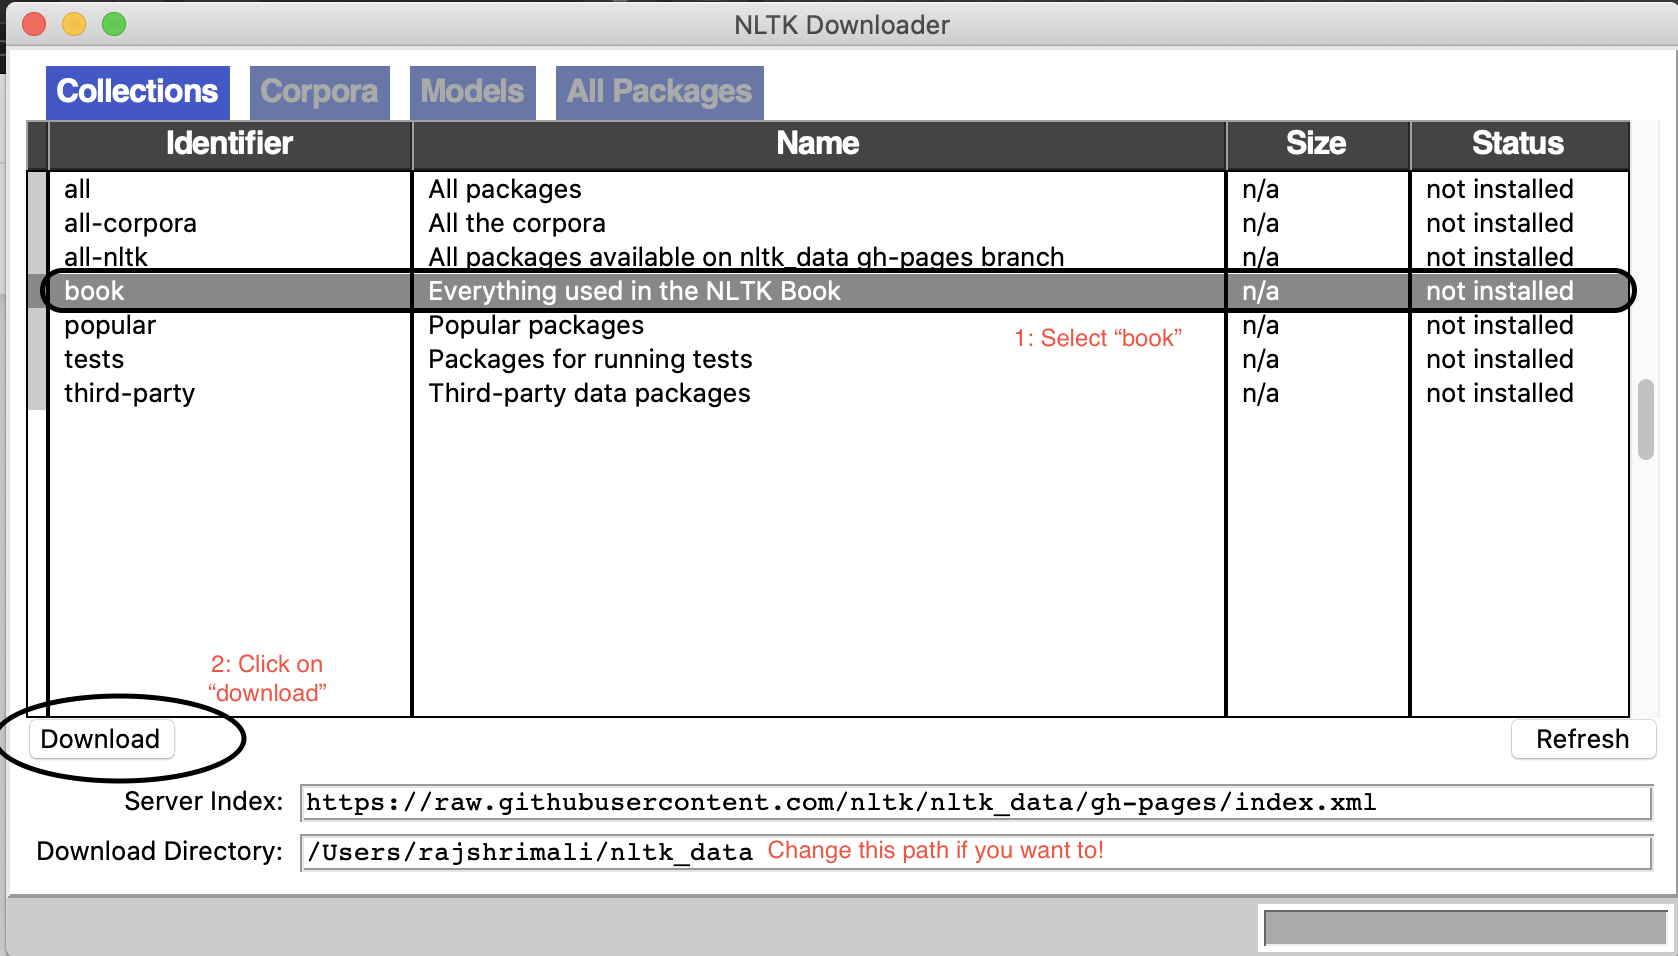

In [6]:
import nltk 
#nltk.download() # downloads the books 

In [7]:
from nltk.book import * 
texts()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


These are the bulit-in texts. We can vew a sample. 

In [8]:
" ".join(text1[:100])

'[ Moby Dick by Herman Melville 1851 ] ETYMOLOGY . ( Supplied by a Late Consumptive Usher to a Grammar School ) The pale Usher -- threadbare in coat , heart , body , and brain ; I see him now . He was ever dusting his old lexicons and grammars , with a queer handkerchief , mockingly embellished with all the gay flags of all the known nations of the world . He loved to dust his old grammars ; it somehow mildly reminded him of his mortality . " While you take in hand to school others ,'

NLTK has a built-in generate... 

In [9]:
print(text1.generate())

Building ngram index...


long , from one to the top - mast , and no coffin and went out a sea
captain -- this peaking of the whales . , so as to preserve all his
might had in former years abounding with them , they toil with their
lances , strange tales of Southern whaling . at once the bravest
Indians he was , after in vain strove to pierce the profundity . ?
then ?" a levelled flame of pale , And give no chance , watch him ;
though the line , it is to be gainsaid . have been
long , from one to the top - mast , and no coffin and went out a sea
captain -- this peaking of the whales . , so as to preserve all his
might had in former years abounding with them , they toil with their
lances , strange tales of Southern whaling . at once the bravest
Indians he was , after in vain strove to pierce the profundity . ?
then ?" a levelled flame of pale , And give no chance , watch him ;
though the line , it is to be gainsaid . have been


Internally, it is still using a markov model! We're going to build a simple version of this. What we're going to do is build a markov chain, where each state is a word. As you can imagine, this markov chain is going to be big! First, let's select a text. 

In [10]:
text=text6 #Select text here 

In [11]:
# first, we're going to put words in an order, so we can easily map from numerical state to word. 
state_to_word = list(set(text)) 
word_to_state = dict(((word, i) for i, word in enumerate(state_to_word)))
# Now we're going to build a numpy array of the correct size. This is going to hold our markov chain.
counter = np.zeros((len(state_to_word), len(state_to_word)), dtype='float')

In [12]:
# now we count. For each word, we're going to incrememnt the next state. 
for i in range(len(text)-1): 
    start_state = word_to_state[text[i]]
    end_state = word_to_state[text[i+1]]
    counter[start_state, end_state] += 1

#now, we simply normalize our rows. 
sum_of_rows = counter.sum(axis=1)
# divide each row 
for i in range(sum_of_rows.shape[0]): 
    counter[i, :] = counter[i, :] / sum_of_rows[i]

Now, that's almost it! We now can start using the markov chain. We just need a starting state.... 

In [13]:
state = 1
number_of_words = 500 
states = [state]
state_choices = np.arange(len(state_to_word))
for _ in range(number_of_words): 
    #select next state 
    next_state = np.random.choice(state_choices, p=counter[state,:])
    states.append(next_state)
    state = next_state


In [14]:
# now finally create the text
print(" ".join(map(state_to_word.__getitem__, states)))

kills HISTORIAN ' re made into the joyful bond of wood . ARTHUR : Yes . BEDEVERE : Thppppt ! LAUNCELOT : Oh , please ! We are some lovely acting , I ' s castle over him . GUARD # 1 : Cider ! GALAHAD : To seek the kingdom of Assyria ? RIGHT HEAD KNIGHT : Pull the north , by force ! DENNIS : Oh , what is a bed - MASTER : Hic ! [ bonk ] [ bonk ] DINGO : No , and brunettes , only a Knight . BEDEVERE : The oral sex ! A path ! ROBIN : No , I bid you must rest awhile . Hm . BEDEVERE : No , sir . The ferocity of a shrubbery . GUARD : Shut up ! GUARD # 2 : Yes , you ! And after the shrubbery , yes , and take him single - Sir Galahad , I know you ! Hee ha haaa ha ha hee hee hee heh heh . LAUNCELOT : The quest ? ARTHUR : Oh , up and valleys of the Round Table NARRATOR : And , ... FRENCH GUARD : Aaagh . VILLAGER # 2 : You know you are not right arm off . WITCH : I built it ! ROBIN : Launcelot ! Come this ? ROBIN : Hic ! Shh ! ... someone it is our land of Swamp Castle Anthrax ? BRIDGEKEEPER : Look

Now, how can we make this better? This gets into the concept of n-grams! The idea is simple! Instead of using just one word to predict next state, we use every two words to predict next state! 

Now, something to note: we can actually save a lot of memory by storing just which states come next instead of storing the entire matrix. Think of it like storing each row separately, and removing all the 0s. This is exaclty what we're going to do, by way of a dictionary. Note for each pair of words, we only store the next 1-gram! 

In [15]:
# build chain dictionary 
def get_ngram_chain(text, n=2): 
    chain_dict = {} 
    for i in range(len(set(text)) - n): 
        n_gram = tuple(text[i:i+n])
        if n_gram in chain_dict: 
            chain_dict[n_gram].append(text[i+n])
        else: 
            chain_dict[n_gram] = [text[i+n]] 
    return chain_dict 

In [16]:
# Get a chain 
chain = get_ngram_chain(text, 2) # Replace None with your n-gram chain! 

now, to use our chain, we follow a similar procedure as before. We first select an n-gram, and then go from there. 

In [17]:
# Select an n-gram. I'm using a two-gram 
ngram = tuple(text[0:2])
words = 500 
generated_text = [k for k in ngram] 
while len(generated_text) < words:
    # get next state 
    next_state = np.random.choice(chain[ngram]) 
    # You'll have to change the following
    ngram = (generated_text[-1], next_state) 
    generated_text.append(next_state)

In [18]:
print(" ".join(generated_text))

SCENE 1 : What I object to is that you automatically treat me like an inferior ! ARTHUR : Yes ! SOLDIER # 1 : Oh , there you go and tell your master that Arthur from the castle of Camelot is here . SOLDIER # 1 : You ' re not . You ' ve got two empty halves of coconut and you ' re fooling yourself . We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot . King of the water signifying by Divine Providence that I , Arthur , son of Uther Pendragon , from the bosom of the water signifying by Divine Providence that I , Arthur , was to carry Excalibur . [ clang ] Bring out your dead ! [ woosh ] [ music stops ] BLACK KNIGHT : Ooh ! [ clang ] [... cough cough ...] [ clang ] CART - MASTER : Thursday . CUSTOMER : Nothing . Here ' s not dead ! CART - MASTER : He hasn ' t be long . CART - MASTER : Not at all . They ' ve lost nine today . CUSTOMER : No you ' re not fooling anyone you know . Look , isn ' t just call you ' Man '. DENNIS : Well , 

What do you think will happen if we make the ngrams even bigger? 

In [20]:
def markov_simulator(text, n, max_words, ngram=None):
    chain = get_ngram_chain(text, n) # Replace None with your n-gram chain! 
    if ngram is None:
        ngram = list(chain.keys())[np.random.randint(0, len(list(chain.keys())))]
    generated_text = [k for k in ngram] 
    while len(generated_text) < max_words:
        # get next state 
        next_state = np.random.choice(chain[ngram]) 
        # You'll have to change the following 
        generated_text.append(next_state)
        ngram = tuple(generated_text[-n:])
    return generated_text

print(" ".join(markov_simulator(text, 3, 500)))

?! SOLDIER # 1 : What ? Ridden on a horse ? ARTHUR : How do you do , good lady . I am in haste . Who lives in that castle over there ? DENNIS : I told you . We ' re an anarcho - syndicalist commune . We take it in turns to act as a sort of executive officer for the week . ARTHUR : Well , why not ? SCENE 2 : [ thud ] [ King Arthur music ] [ thud thud thud ] [ King Arthur music ] [ music stops ] ARTHUR : Old woman ! DENNIS : Oh , yeah , an African swallow ! SOLDIER # 1 : Pull the other one ! ARTHUR : Shut up , will you . Shut up ! DENNIS : Oh ! Come and see the violence inherent in the system . ARTHUR : Then who is your lord ? WOMAN : We don ' t vote for you . ARTHUR : Then who is your lord ? WOMAN : We don ' t want to go on the cart ! CUSTOMER : Here ' s one . CART - MASTER : Bring out your dead ! [ clang ] BLACK KNIGHT : Aaagh ! [ King Arthur music stops ] BLACK KNIGHT : Aaagh ! GREEN KNIGHT : Aaaaaah ! Aaaaaaaaah ! [ woosh ] [ BLACK KNIGHT kills GREEN KNIGHT ] [ thud thud thud ] [ Kin

In [24]:
print(" ".join(markov_simulator(text, 35, 500)))

: Ninepence . DEAD PERSON : I ' m not dead ! CART - MASTER : What ? CUSTOMER : Nothing . Here ' s your ninepence . DEAD PERSON : I ' m not dead ! CART - MASTER : ' Ere . He says he ' s not dead ! CUSTOMER : Yes he is . DEAD PERSON : I ' m not ! CART - MASTER : He isn ' t ? CUSTOMER : Well , he will be soon . He ' s very ill . DEAD PERSON : I ' m getting better ! CUSTOMER : No you ' re not . You ' ll be stone dead in a moment . CART - MASTER : Oh , I can ' t take him like that . It ' s against regulations . DEAD PERSON : I don ' t want to go on the cart ! CUSTOMER : Oh , don ' t be such a baby . CART - MASTER : I can ' t take him . DEAD PERSON : I feel fine ! CUSTOMER : Well , do us a favor . CART - MASTER : I can ' t . CUSTOMER : Well , can you hang around a couple of minutes ? He won ' t be long . CART - MASTER : No , I ' ve got to go to the Robinson ' s . They ' ve lost nine today . CUSTOMER : Well , when ' s your next round ? CART - MASTER : Thursday . DEAD PERSON : I think I ' ll g

What do you think is happening? 